# Lending Club Loan Approval System

## Business Background

Lending Club is a peer-to-peer lending company where individuals can borrow loans, and investors can fund those loans. Lending Club was founded in 2006 by Renaud Laplanche as a peer-to-peer (P2P) lending platform in San Francisco. It was one of the pioneers in the online lending space, where individual borrowers could obtain loans, and individual or institutional investors could invest in these loans to earn interest. The platform allowed for a more direct connection between lenders and borrowers, bypassing traditional banking intermediaries.

## Problem Statement

Now, whenever *Lending Club* approves a loan, there are two ways in which it is at risk:
- If LC approves a loan and the borrower fails to repay it on time
- If LC rejects a loan despite the borrower being capable of repaying the loan

Defaulting on loans can lead to significant financial losses for both the platform and investors. Similarly, not providing loans to credit-worthy customers can lead to missing out on potential revenue and profits. Therefore, a robust loan approval system is the need of the hour.

In the current loan approval process, underwriters evaluate loan applications by manually reviewing credit scores, income, debt, etc. and then, based on several parameters, either approve or reject a loan. This process is time-consuming and prone to errors.

Hence, Lending Club wants to build a loan approval system using Machine Learning models to automatically assess whether a given loan is likely to be repaid or whether the borrower is likely to default.

This is where you come in! As a budding data scientist, your goal is to help out Lending Club in creating this ML model that helps them predict whether a loan is likely to default or not.

## Data Understanding

You have been provided with around 38k loan application data from the Lending Club's website. The different columns and their description are mentioned below:

| Column Name         | Description                                                                                                                                                    |
|---------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| id                  | A unique LC assigned ID for the loan listing. *(Integer)*                                                                                                       |
| member_id           | A unique LC assigned ID for the borrower member. *(Integer)*                                                                                                    |
| loan_amnt           | The listed amount of the loan applied for by the borrower. If at some point the credit department reduces the loan amount, it will be reflected in this value. *(Float)* |
| term                | The number of payments on the loan. Values are in months and can be either 36 or 60. *(Integer)*                                                                 |
| int_rate            | Interest rate on the loan. *(Float)*                                                                                                                            |
| installment         | The monthly payment owed by the borrower if the loan originates. *(Float)*                                                                                       |
| grade               | LC assigned loan grade. *(Categorical/String)*                                                                                                                  |
| sub_grade           | LC assigned loan subgrade. *(Categorical/String)*                                                                                                               |
| emp_length          | Employment length in years. Possible values are between 0 and 10, where 0 means less than one year and 10 means ten or more years. *(Integer)*                   |
| home_ownership      | The home ownership status provided by the borrower during registration. Values are: RENT, OWN, MORTGAGE, OTHER. *(Categorical/String)*                           |
| annual_inc          | The self-reported annual income provided by the borrower during registration. *(Float)*                                                                         |
| verification_status | Indicates if income was verified by LC, not verified, or if the income source was verified. *(Categorical/String)*                                               |
| purpose             | A category provided by the borrower for the loan request. *(Categorical/String)*                                                                                |
| dti                 | A ratio calculated using the borrower’s total monthly debt payments (excluding mortgage and the requested LC loan), divided by the borrower’s self-reported income. *(Float)* |
| delinq_2yrs         | The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years. *(Integer)*                                         |
| inq_last_6mths      | The number of inquiries in the past 6 months (excluding auto and mortgage inquiries). *(Integer)*                                                                |
| open_acc            | The number of open credit lines in the borrower's credit file. *(Integer)*                                                                                       |
| pub_rec             | Number of derogatory public records. *(Integer)*                                                                                                                |
| revol_bal           | Total credit revolving balance. *(Float)*                                                                                                                       |
| revol_util          | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. *(Float)*                             |
| total_acc           | The total number of credit lines currently in the borrower's credit file. *(Integer)*                                                                            |
| last_pymnt_amnt     | Last total payment amount received. *(Float)*                                                                                                                   |
| loan_status         | Current status of the loan. *(Categorical/String)*                                                                 
                  |

...

## Starter Code

### Necessary Imports

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
pd.set_option('display.max_columns', None)
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

### Data Loading

In [9]:
## Load the dataset
data = pd.read_csv('loans.csv')

In [10]:
## Observe the first few rows
## Do you observe any issues?
data.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status
0,1077501,1296599.0,5000.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7%,9.0,171.62,Fully Paid
1,1077430,1314167.0,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4%,4.0,119.66,Charged Off
2,1077175,1313524.0,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5%,10.0,649.91,Fully Paid
3,1076863,1277178.0,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,10.0,0.0,5598.0,21%,37.0,357.48,Fully Paid
4,1075269,1311441.0,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3%,12.0,161.03,Fully Paid


In [11]:
## Check the dataframe structure - datatypes and number of non-null rows
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38770 entries, 0 to 38769
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38770 non-null  int64  
 1   member_id            38770 non-null  float64
 2   loan_amnt            38770 non-null  float64
 3   term                 38770 non-null  object 
 4   int_rate             38770 non-null  object 
 5   installment          38770 non-null  float64
 6   grade                38770 non-null  object 
 7   sub_grade            38770 non-null  object 
 8   emp_length           37734 non-null  object 
 9   home_ownership       38770 non-null  object 
 10  annual_inc           38770 non-null  float64
 11  verification_status  38770 non-null  object 
 12  purpose              38770 non-null  object 
 13  dti                  38770 non-null  float64
 14  delinq_2yrs          38770 non-null  float64
 15  inq_last_6mths       38770 non-null 

In [12]:
## Check the shape
data.shape

(38770, 23)

In [13]:
## Check the missing values across the columns
data.isna().sum()

,0
id,0
member_id,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,1036
home_ownership,0


#### Observations

Data has total of 38770 rows and 23 columns. It comprises of both categorical (dtypes object) and numerical (float64, int64) values. Data seem to have consistent non-null value in rows except  the exception of 'emp_length' which has 1036 missing values and 'revol_util' which has 50 missing values.

### Data Cleaning

- Perform missing value treatment
- Remove extra symbols, characters, etc. from appropriate columns

We need to clean data for other columns to get most of our analysis.
List of columns that needs some data cleaning and type conversions are:
  
*   Term (cleaning and convert)
*   emp_length (cleaning and convert)
*   int_rate (cleaning and convert)
*   deling_2yrs (convert)
*   inq_last_6mths (convert)
*   open_acc (convert)
*   pub_rec (convert)



In [14]:
import regex as re
data = data.dropna()
## we need to extract the digit from emp_length and convert it into integer values for important data analysis.
data['emp_length'] = data['emp_length'].apply(lambda x: re.sub('\D', '', x)).astype(int)

In [15]:
data['term'] = data['term'].apply(lambda x: re.sub('\D', '', x)).astype(int)
data['int_rate']= data['int_rate'].apply(lambda x: re.sub(x[-1], '', x)).astype(float)
data['revol_util'] = data['revol_util'].apply(lambda x: re.sub(x[-1], '', x)).astype(float)
data['delinq_2yrs'] = data['delinq_2yrs'].astype(int)
data['inq_last_6mths'] = data['inq_last_6mths'].astype(int)
data['open_acc'] = data['open_acc'].astype(int)
data['pub_rec'] = data['pub_rec'].astype(int)

In [16]:
## Write your code
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37687 entries, 0 to 38769
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   37687 non-null  int64  
 1   member_id            37687 non-null  float64
 2   loan_amnt            37687 non-null  float64
 3   term                 37687 non-null  int64  
 4   int_rate             37687 non-null  float64
 5   installment          37687 non-null  float64
 6   grade                37687 non-null  object 
 7   sub_grade            37687 non-null  object 
 8   emp_length           37687 non-null  int64  
 9   home_ownership       37687 non-null  object 
 10  annual_inc           37687 non-null  float64
 11  verification_status  37687 non-null  object 
 12  purpose              37687 non-null  object 
 13  dti                  37687 non-null  float64
 14  delinq_2yrs          37687 non-null  int64  
 15  inq_last_6mths       37687 non-null  int6

##### Dropping the unnecessary columns

- Columns which are not required for analysis - `id`, `member_id`
- Columns which are not available at the time of loan approval (Check the data dictionary and problem statement to understand this more) - `installment` and `last_pymnt_amnt`

In [17]:
## Drop the above columns
data.drop(columns=['id', 'member_id', 'installment', 'last_pymnt_amnt'], inplace=True)

In [18]:
## Check the dataframe and highlight important information
def check_dataframe():
  columns = data.columns
  shape = data.shape
  nulls = data.isna().sum()
  dtypes = data.dtypes
  print(f'List of columns in the dataframe is - {columns}')
  print('\n')
  print(f'Total rows in the dataframe is --> {shape[0]} and Total columns is --> {shape[1]}')
  print('\n')
  print(f'checking if dataframe has any empty values --> \n {nulls}')
  print('\n')
  print(f'data types of the columns in the dataframe are --> \n {dtypes}')

check_dataframe()

List of columns in the dataframe is - Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'loan_status'],
      dtype='object')


Total rows in the dataframe is --> 37687 and Total columns is --> 19


checking if dataframe has any empty values --> 
 loan_amnt              0
term                   0
int_rate               0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
purpose                0
dti                    0
delinq_2yrs            0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
loan_status            0
dtype: int64


data types of the columns in the dataframe are

Perform any additional data preparation steps if needed

In [19]:
## getting list of all the categorical variables
categorical_var = [x for x in data.columns if data[x].dtypes == 'object']
categorical_var

['grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'purpose',
 'loan_status']

In [20]:
## getting list of all the numerical variables
numerical_var = [x for x in data.columns if data[x].dtypes != 'object']
numerical_var

['loan_amnt',
 'term',
 'int_rate',
 'emp_length',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc']

### Exploratory Data Analysis

Let's understand the key drivers of loan default using EDA. This will form the preliminary analysis before we start with our machine learning model building part. We can understand the distributions of different variables, how they are related with loan default and so on.

#### Univariate Analysis

Performing univariate analysis on the following variables. Using visualizations and summary statistics wherever necessary. 
- `loan_status`
- `term`
- `grade`
- `purpose`
- `loan_amnt`
- `annual_inc`

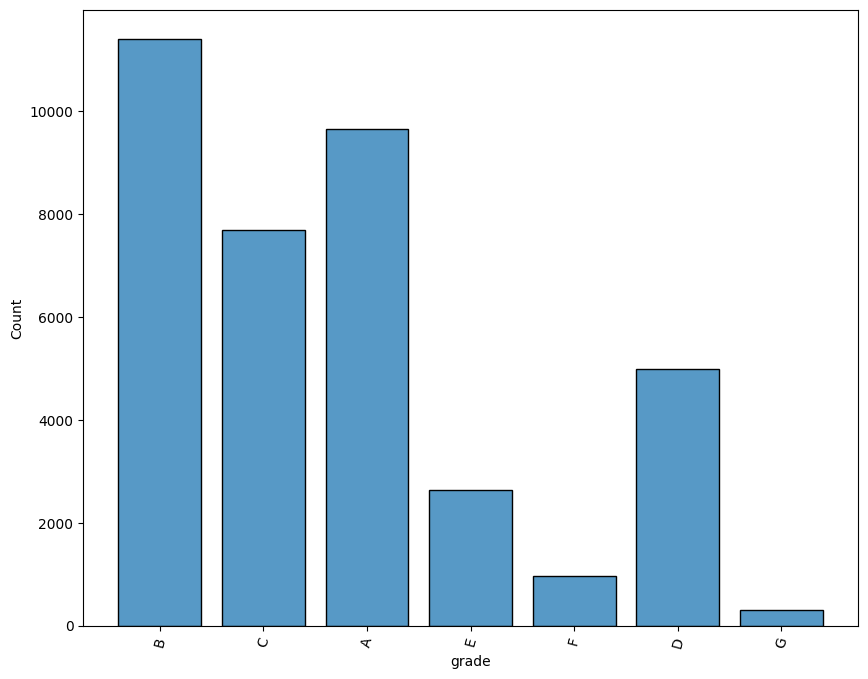

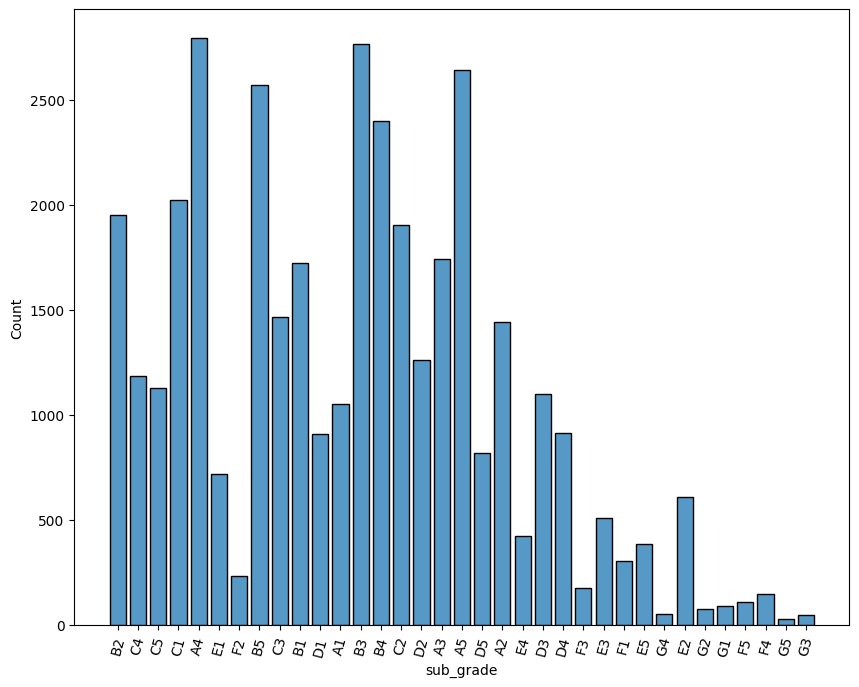

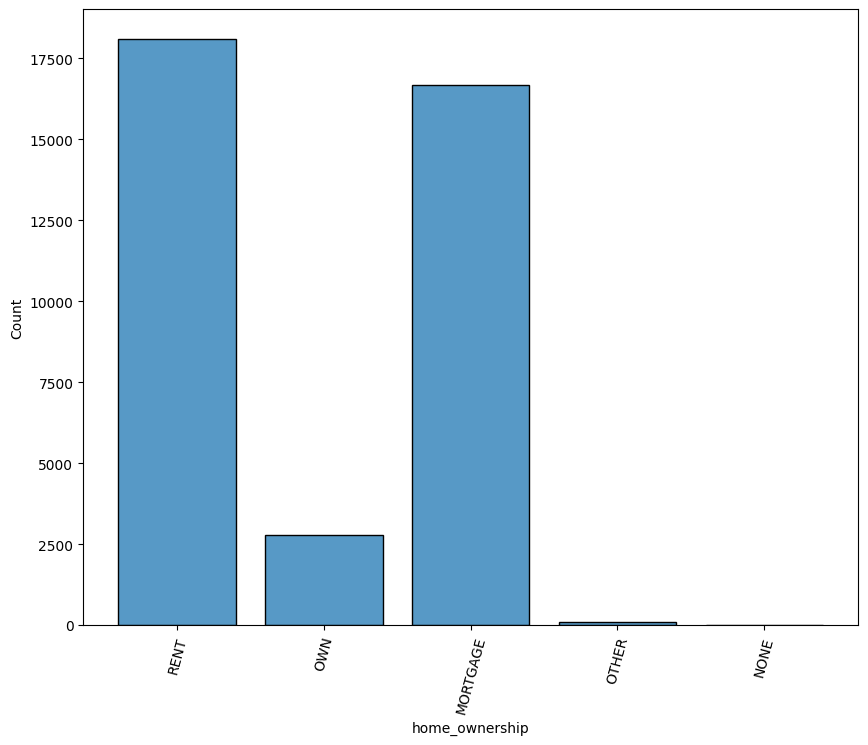

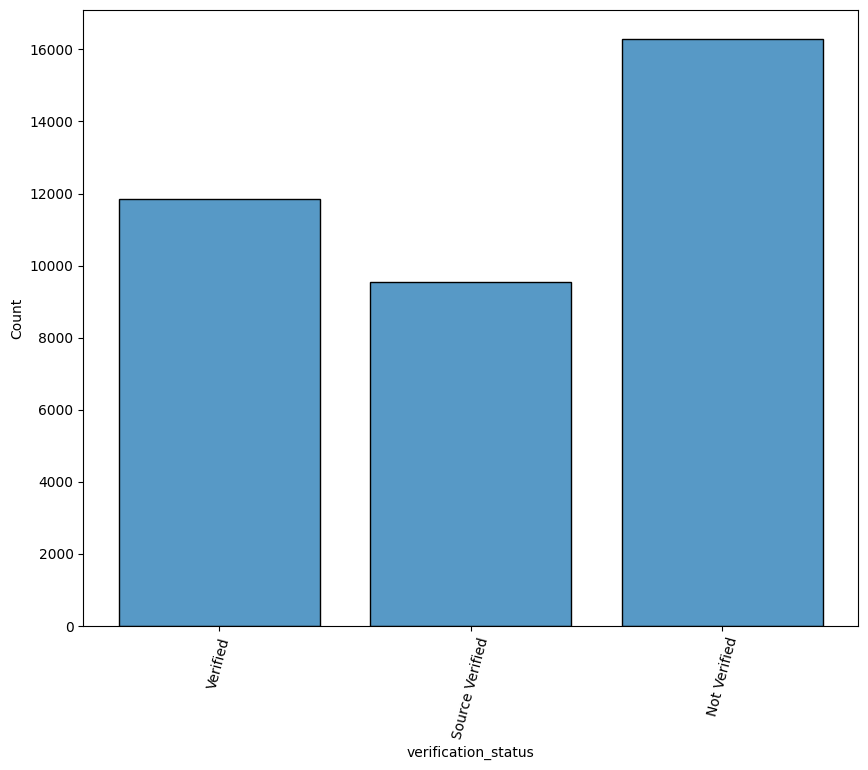

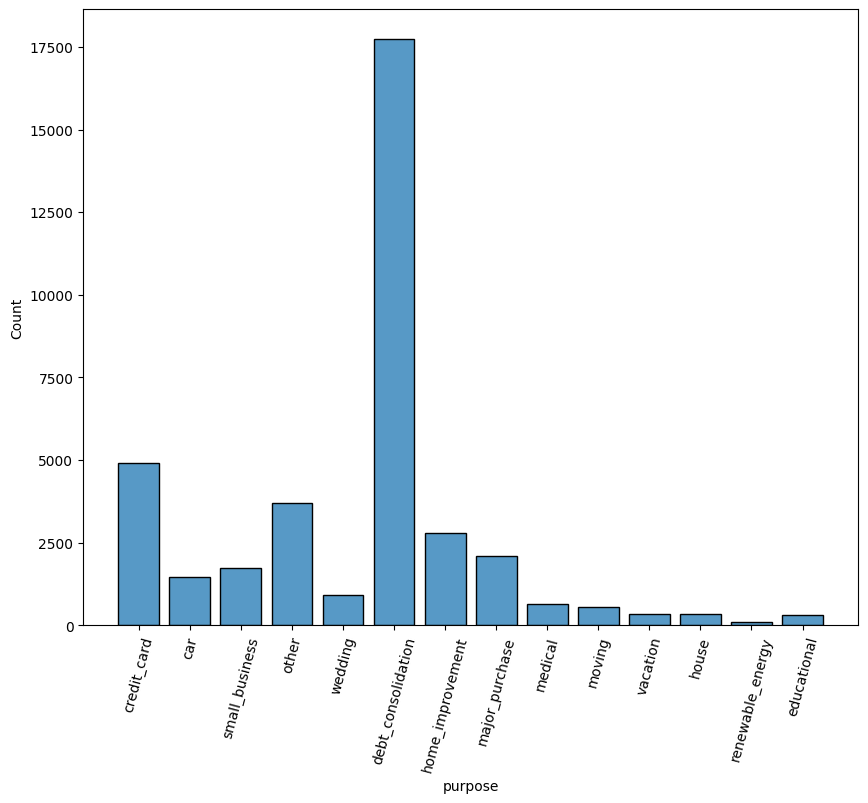

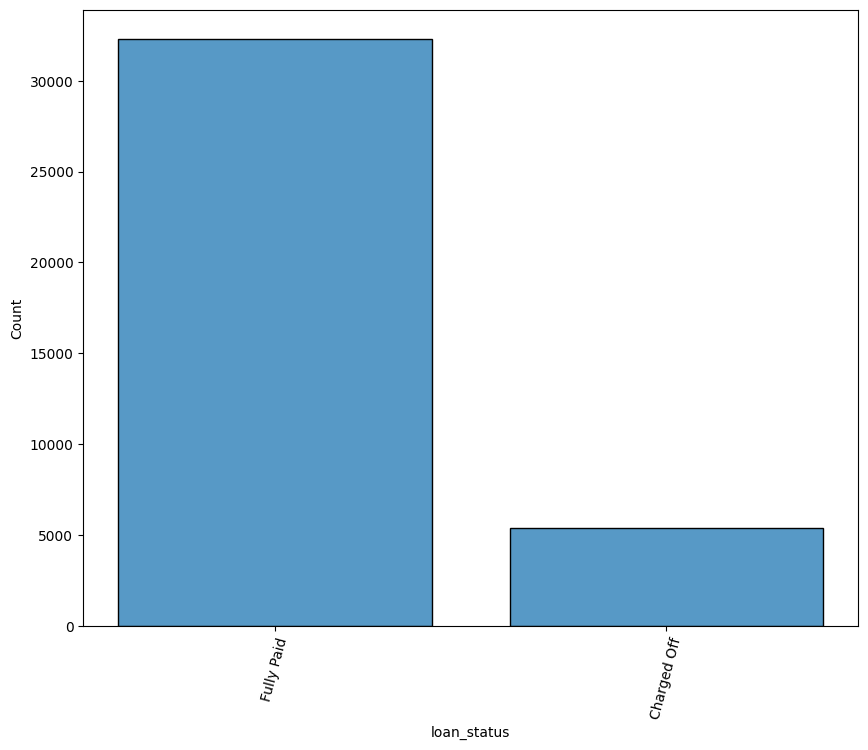

In [21]:
## Loop through each categorical feature in the dataframe and print the value counts in form of histogram
for column in categorical_var:
  plt.figure(figsize=(10,8))
  sns.histplot(data=data[column], shrink=0.8)
  plt.xticks(rotation=75)
  plt.show()

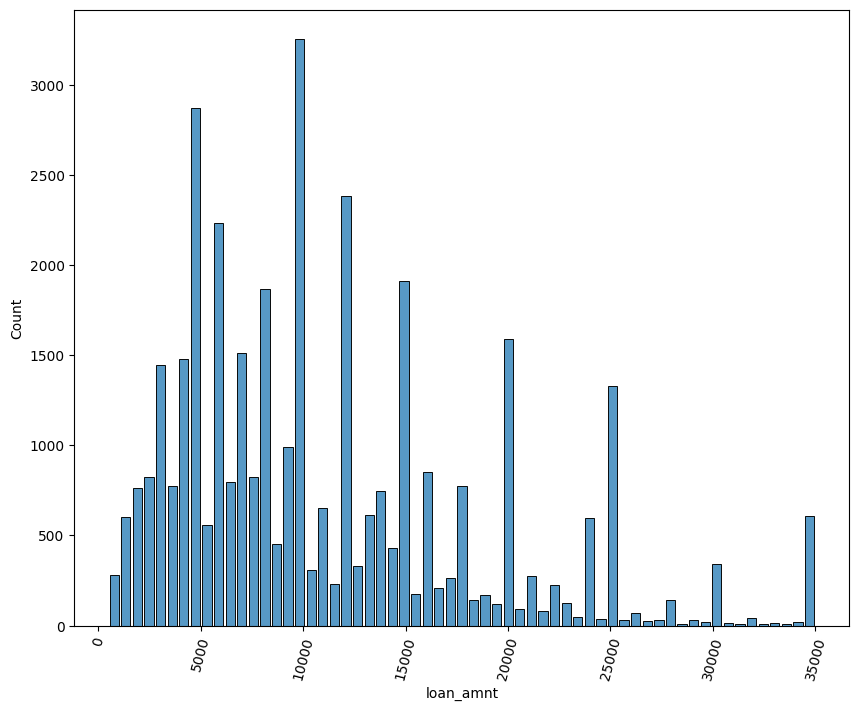

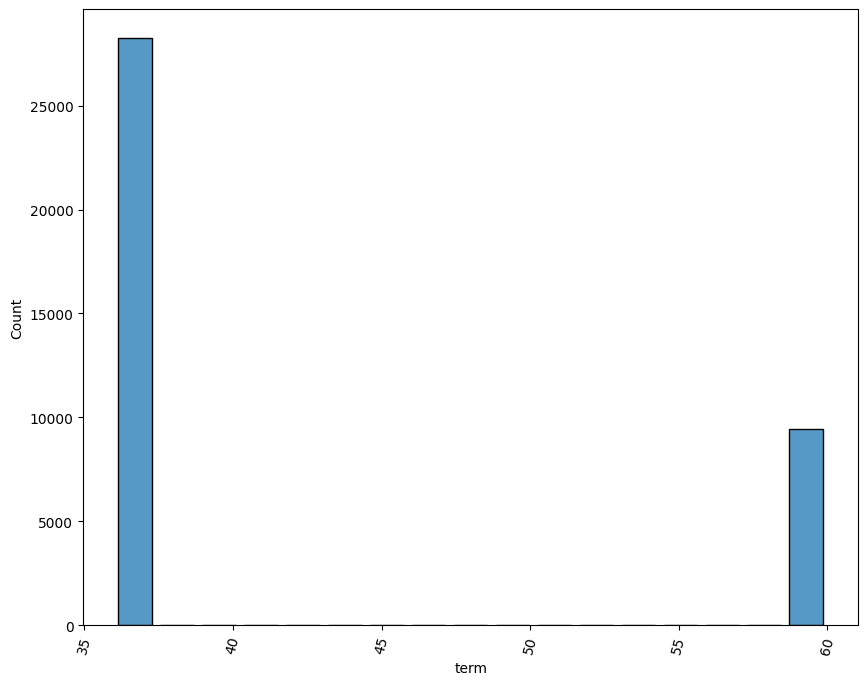

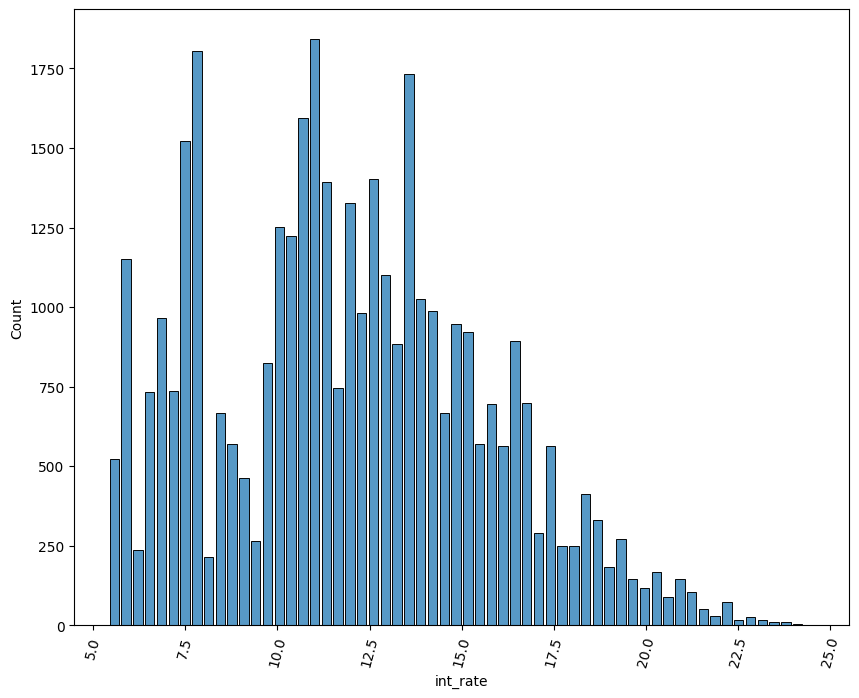

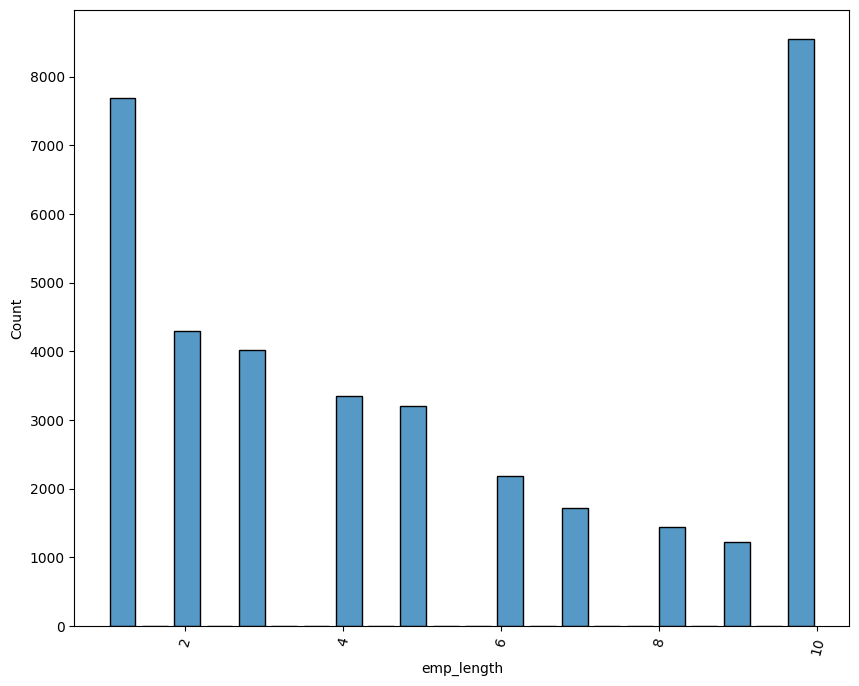

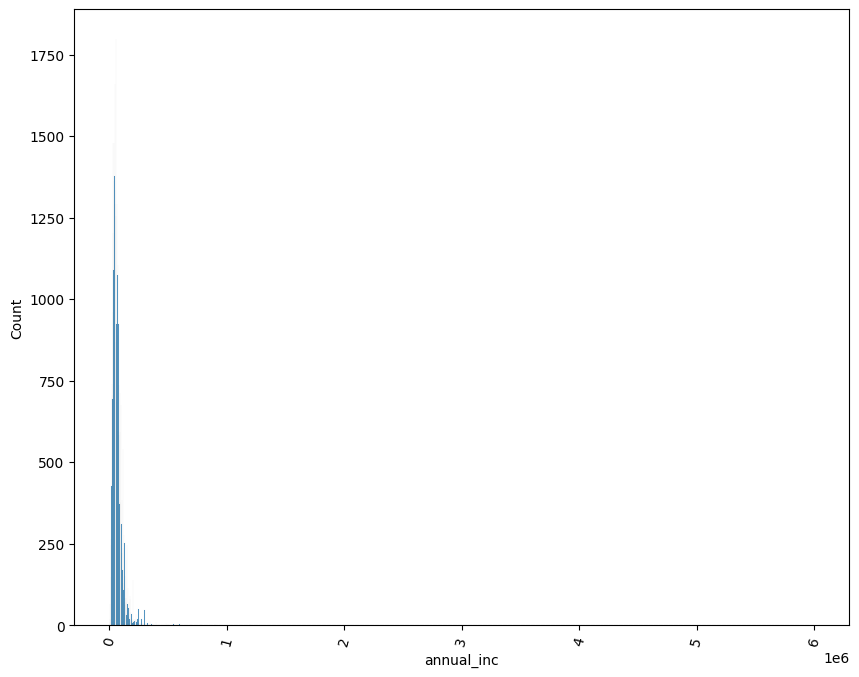

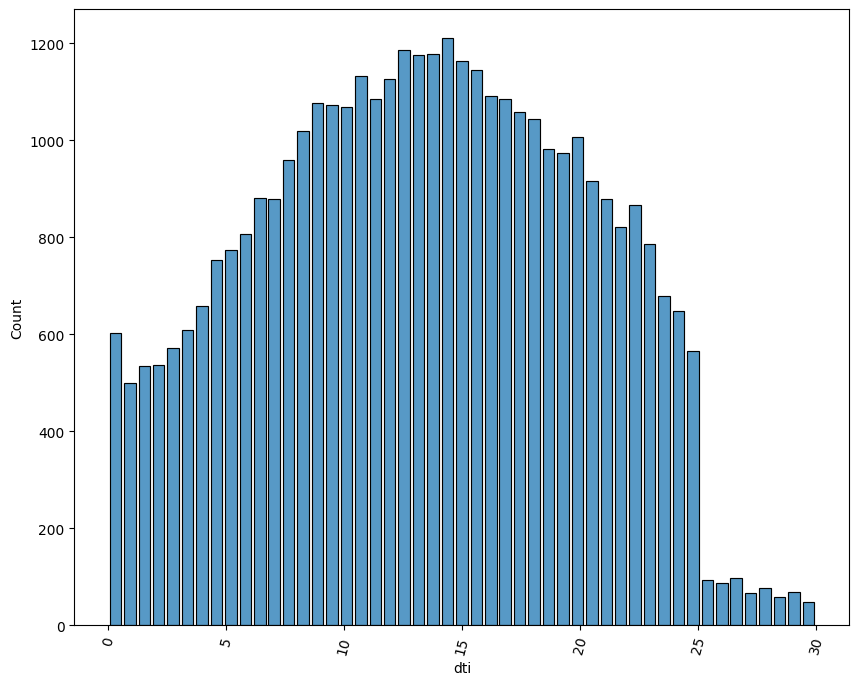

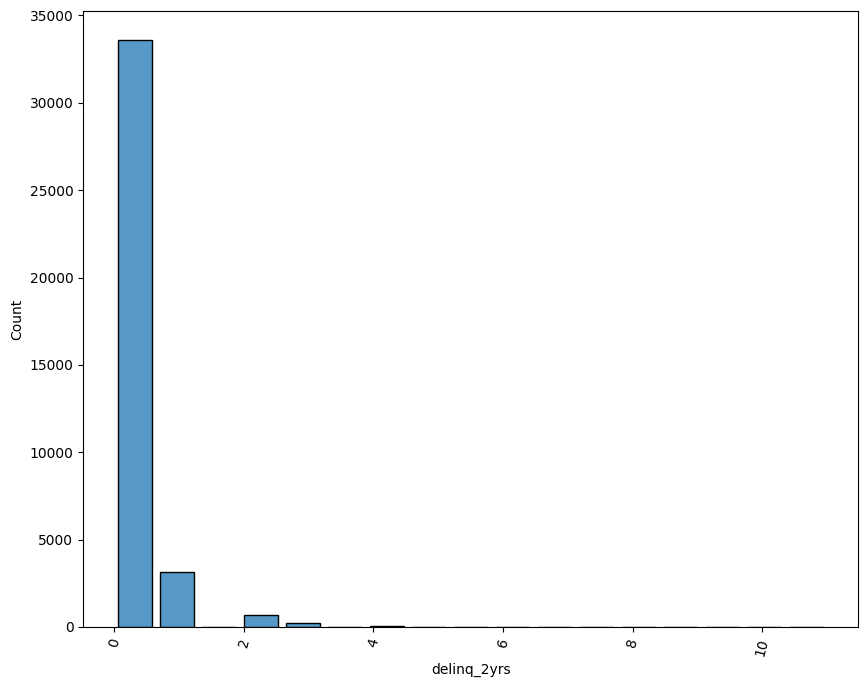

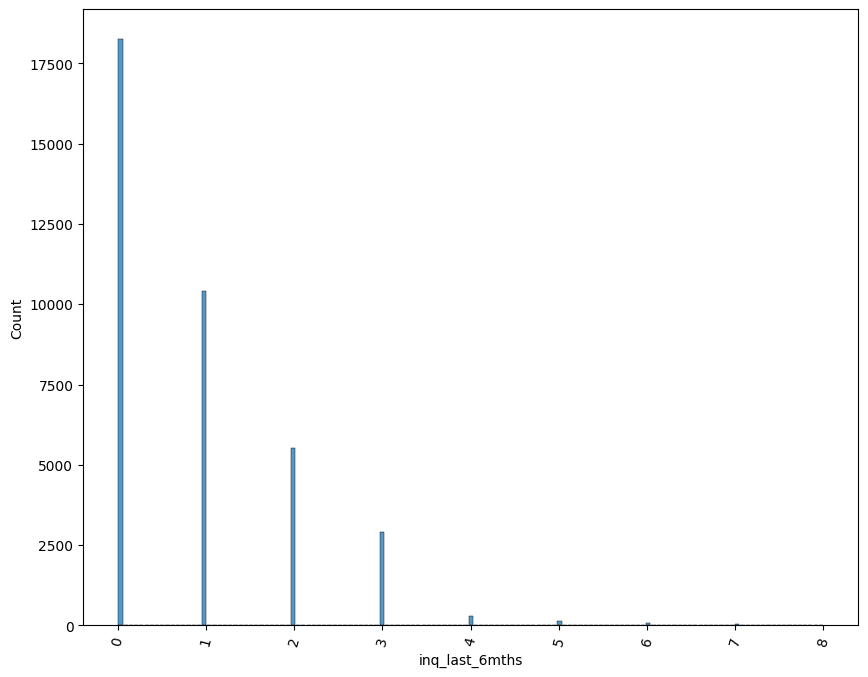

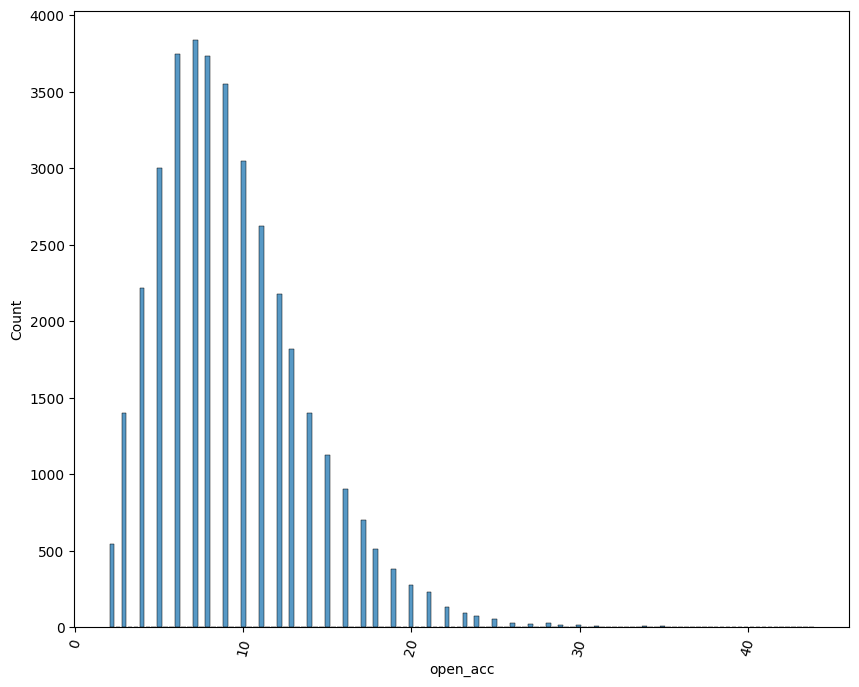

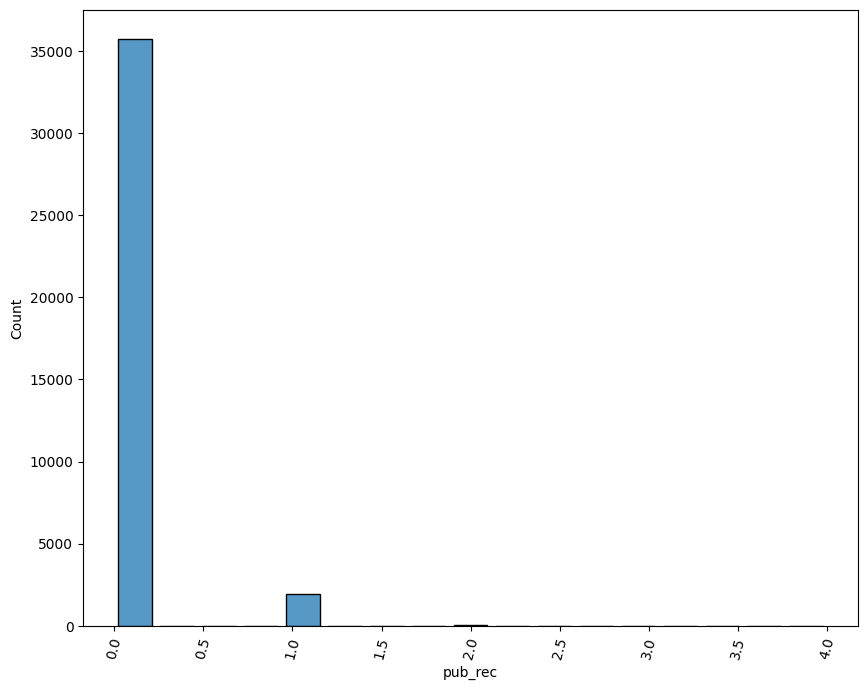

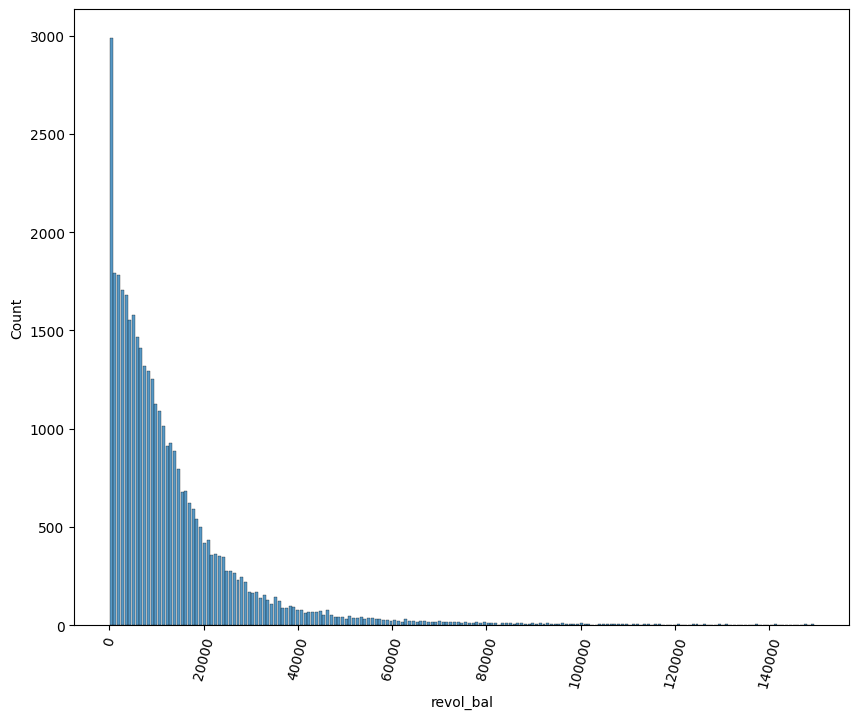

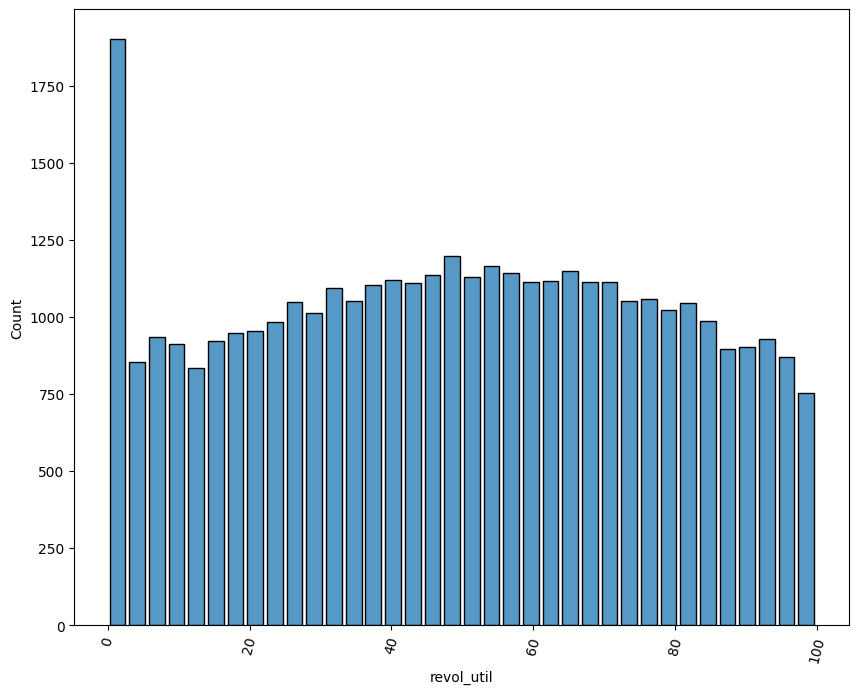

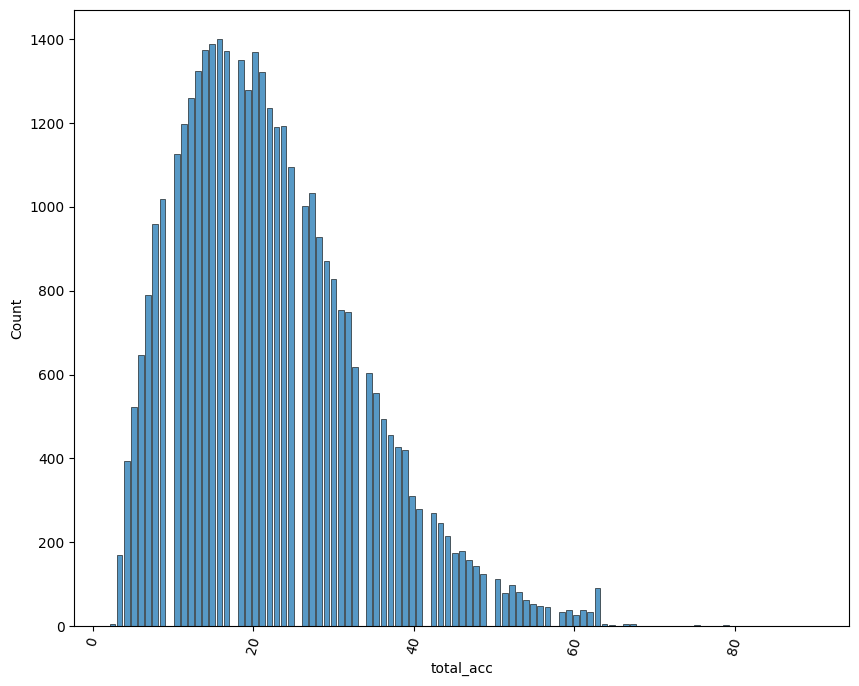

In [22]:
## loop thorugh each numerical features in the dataframe and print the value counts in form of histogram
for column in numerical_var:
  plt.figure(figsize=(10,8))
  sns.histplot(data=data[column], shrink=0.8)
  plt.xticks(rotation=75)
  plt.show()

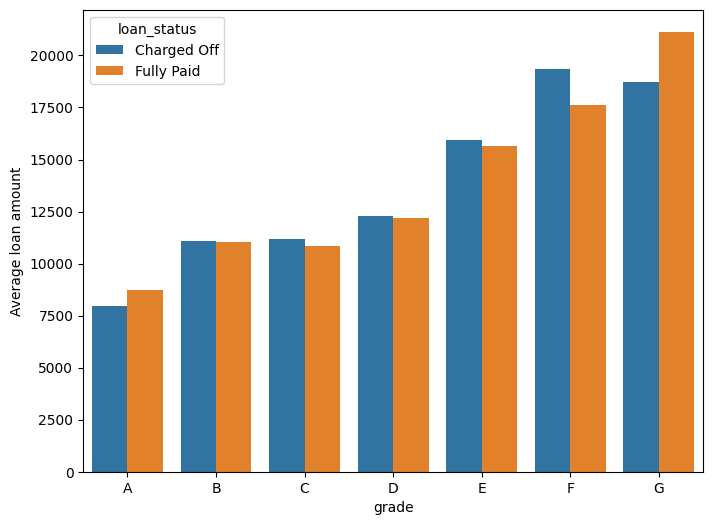

In [23]:
## calculate average loan amount for employees who paid off the loan vs who charged off
loan_status = data.groupby(['loan_status', 'grade'])['loan_amnt'].mean().reset_index(name='Average loan amount')
plt.figure(figsize=(8,6))
sns.barplot(loan_status, x='grade', y='Average loan amount', hue='loan_status')
plt.show()

#### Bivariate Analysis

For the bivariate analysis, you can perform multiple analysis such as follows:

- How the default rate varies across the different variables
- Correlation Matrix
- etc.

Text(0.5, 1.0, 'Correlation between numerical features')

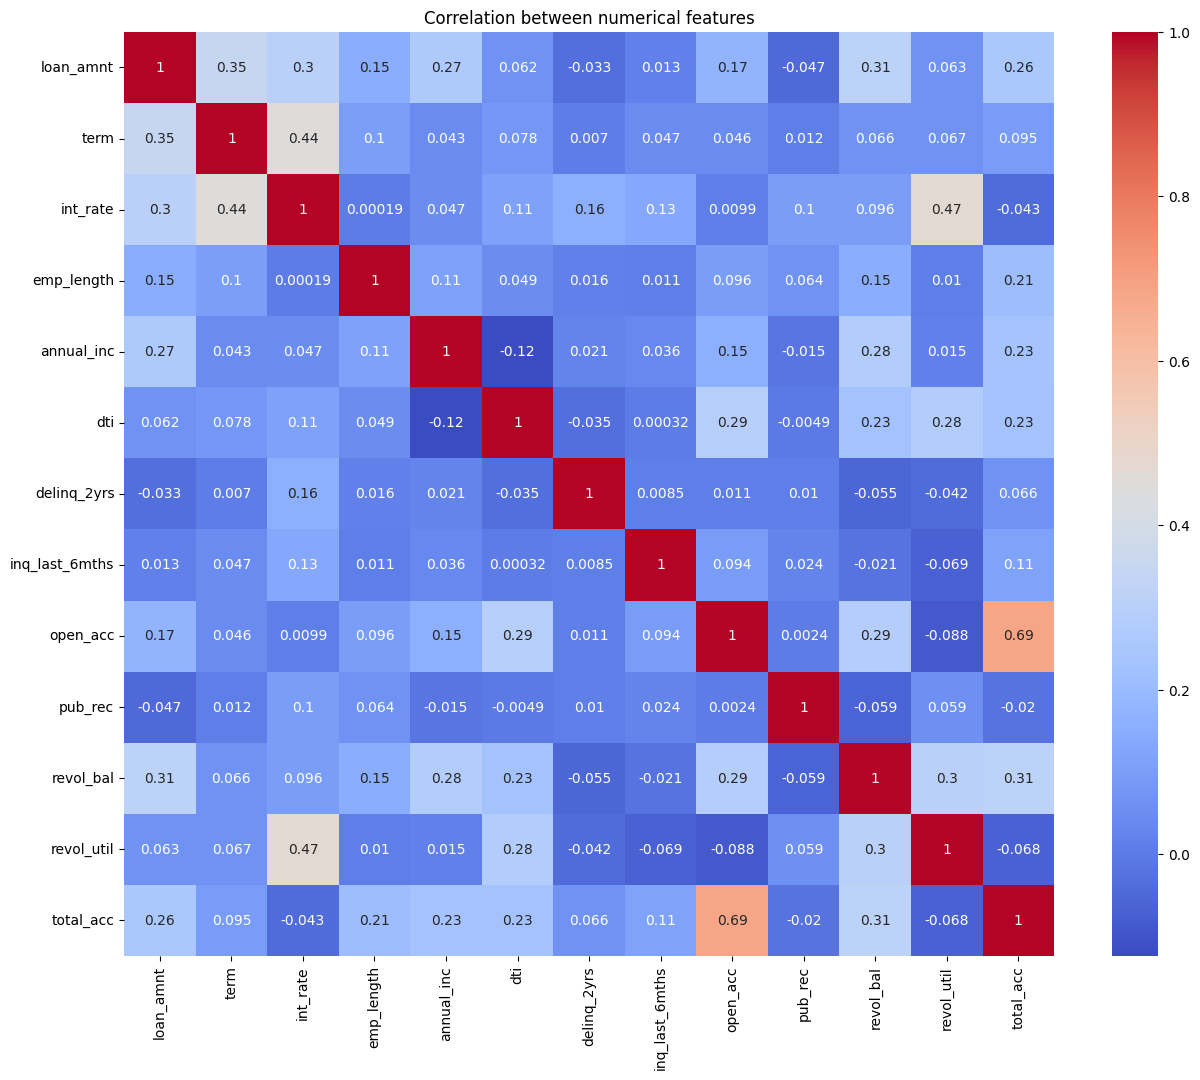

In [26]:
# Explore the relationship between several features
data_corr = data[numerical_var].corr()
plt.figure(figsize=[15,12])
sns.heatmap(data_corr, cmap='coolwarm', annot=True)
plt.title('Correlation between numerical features')

In [27]:
data[categorical_var]

,grade,sub_grade,home_ownership,verification_status,purpose,loan_status
0,B,B2,RENT,Verified,credit_card,Fully Paid
1,C,C4,RENT,Source Verified,car,Charged Off
2,C,C5,RENT,Not Verified,small_business,Fully Paid
3,C,C1,RENT,Source Verified,other,Fully Paid
4,A,A4,RENT,Source Verified,wedding,Fully Paid
...,...,...,...,...,...,...
38765,A,A4,MORTGAGE,Not Verified,home_improvement,Fully Paid
38766,C,C1,RENT,Not Verified,credit_card,Fully Paid
38767,A,A4,MORTGAGE,Not Verified,debt_consolidation,Fully Paid
38768,A,A2,MORTGAGE,Not Verified,other,Fully Paid


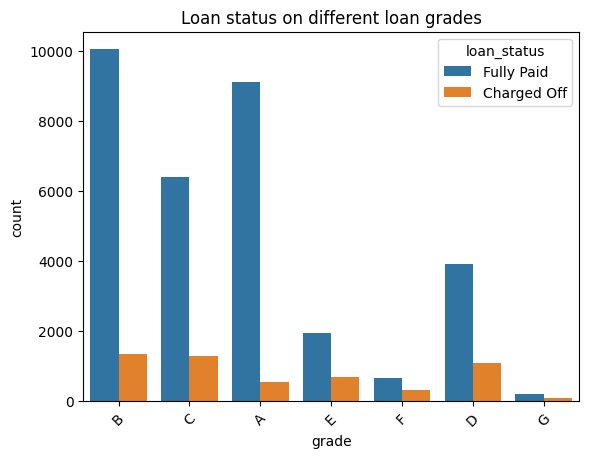

In [28]:
#Examine how loan status is distributed across different loan grades
sns.countplot(data, x='grade', hue='loan_status')
plt.xticks(rotation=45)
plt.title('Loan status on different loan grades')
plt.show()

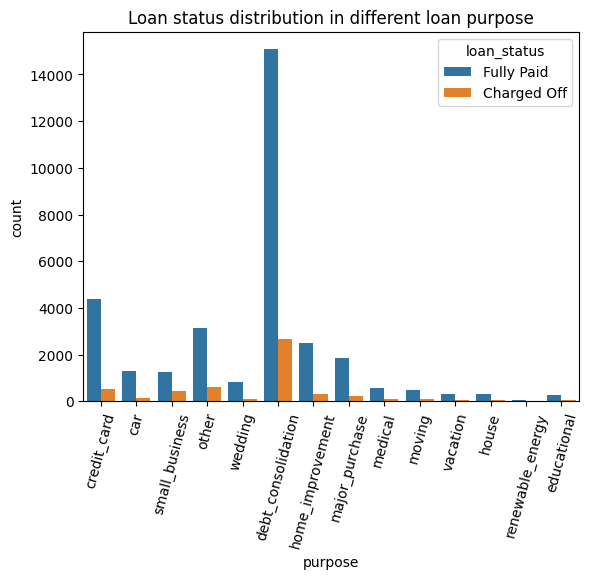

In [29]:
#Examine how loan status is distributed across different loan purpose
sns.countplot(data, x='purpose', hue='loan_status')
plt.xticks(rotation=75)
plt.title('Loan status distribution in different loan purpose')
plt.show()

In [30]:
#Write your code here
data['sub_grade'].unique()

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

#### Pre-ML Data Pre-Processing

Before building the machine learning model, we shall perform
- encoding on all the categorical variables
- handle class imbalance
- train-test split
- scaling

**Train-test split**

Now that we have handled class imbalance, let's perform the train-test split. We have to do a few additional imports

In [31]:
# Splitting our dataset between training and testing set
from sklearn.model_selection import train_test_split
X = data.drop(['loan_status'], axis=1)
y = data['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=1234)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print('-----------------------------')
print('Finding the class distribution between both train and test data set')
train_dist = y_train.to_frame()['loan_status'].value_counts(normalize=True)*100
test_dist = y_test.to_frame()['loan_status'].value_counts(normalize=True)*100
dist_df = pd.concat([train_dist, test_dist], axis = 1).reset_index()
dist_df.columns = ['loan_status', 'y_train', 'y_test']
dist_df

(30149, 18) (7538, 18) (30149,) (7538,)
-----------------------------
Finding the class distribution between both train and test data set


,loan_status,y_train,y_test
0,Fully Paid,85.694385,85.699124
1,Charged Off,14.305615,14.300876


<Figure size 1000x800 with 0 Axes>

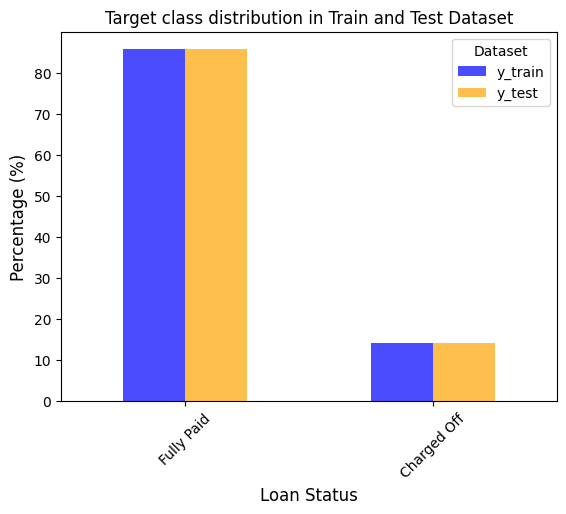

In [32]:
## Check the distribution of class in the newly resampled data
plt.figure(figsize=(10,8))
dist_df.plot(kind='bar', x='loan_status', color=['blue', 'orange'], alpha=0.7)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Loan Status', fontsize=12)
plt.legend(title='Dataset')
plt.xticks(rotation=45)
plt.title('Target class distribution in Train and Test Dataset')
plt.show()


Looking at the chart there seems to be a high class imbalance in the data. 'Fully Paid' seems to have approx 84% weightage whereas 'charged Off' seem to have only 16% weightage approximately. We need to take care of this Imabalance.

**Separate the Numerical and Categorical columns for both train and test sets**

In [33]:
categorical_var.remove('loan_status')

train_numerical = X_train[numerical_var]
test_numerical = X_test[numerical_var]

train_categorical = X_train[categorical_var]
test_categorical = X_test[categorical_var]

**Standardize the numerical Columns using StandardScaler() for Distance based Models or ML algorithms that relies on distance metrics.**

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_numerical_scaled = scaler.fit_transform(train_numerical)
test_numerical_scaled = scaler.transform(test_numerical)

##### **Encoding variables**

In [35]:
# Encoding the categorical variables using OneHotEncoder
from sklearn import preprocessing
encoder = preprocessing.OneHotEncoder(sparse_output=False)

## Will be encoding categorical features on both train and test data.

train_categorical_encoded = encoder.fit_transform(train_categorical)
test_categorical_encoded = encoder.transform(test_categorical)
# final_categorical_encoded = pd.DataFrame(data_labelencode, columns = list(encoder.get_feature_names_out(categorical_var)))
# final_categorical_encoded.head(5)

**Combine both scaled numerical columns and encoded categorical columns**

In [36]:
train_final = np.hstack([train_numerical_scaled, train_categorical_encoded])
test_final = np.hstack([test_numerical_scaled, test_categorical_encoded])

## Converting the final train and test sets into a DataFrame

X_train_conv = pd.DataFrame(train_final, columns = numerical_var + list(encoder.get_feature_names_out()))
X_test_conv = pd.DataFrame(test_final, columns = numerical_var + list(encoder.get_feature_names_out()))

**Encode the target variable (Fully Paid: 1, Charged Off: 0)**

In [37]:
# Encode the target variable in the training set
y_train_conv = y_train.apply(lambda x: 1 if x == 'Fully Paid' else 0)
y_test_conv = y_test.apply(lambda x: 1 if x == 'Fully Paid' else 0)
y_test_conv.value_counts()

,count
loan_status,
1,6460
0,1078


**Handling Class Imbalance**

Suggestion - Perform SMOTE here

In [38]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1234)
X_train_smote,y_train_smote = smote.fit_resample(X_train_conv,y_train_conv)
y_train_smote.value_counts()

,count
loan_status,
1,25836
0,25836


**Scaling**

In [40]:
from sklearn.preprocessing import MinMaxScaler
# Write code for MinMax Scaler


### Model Building and Model Evaluation

- Your task is to build at least 3 models and evaluate their performance
- Start with a baseline model such as logistic regression
- Build additional models like decision trees, random forests, XGboost, etc.
- Make sure you're checking for overfitting and underfitting
- Use cross-validation and hyperparamater tuning to fit the best models
- Evaluate each of the model using metrics such as accuracy, precision, recall, ROC-AUC score, etc.
- Select the best possible model that you will be using for classfication

**Let's start off with the simplest model - Logistic Regression**
We are going to perform 2 different ways in logistic regression


*   Logistic regression with default threshold (0.5)
*   Logistic regression using SMOTE to address class imbalance and optimal threshold



In [41]:
### This is a logistic regression model with default threshold.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
LRM = LogisticRegression(max_iter=1000, random_state=1234)
LRM.fit(X_train_smote, y_train_smote)
## Predict probabilities for the test set (To calculate AUC later)
y_proba = LRM.predict_proba(X_test_conv)[:,1]
## Make predictions using defaul threshold of 0.5
y_pred = LRM.predict(X_test_conv)
## Calculate Accuracy, Precision, Recall, and F1 Score
precision = precision_score(y_test_conv, y_pred)
recall = recall_score(y_test_conv, y_pred)
accuracy = accuracy_score(y_test_conv, y_pred)
f1 = f1_score(y_test_conv, y_pred)

print('This is the logistic regression model with default threshold')
print('-----------------------------------------------------------------')
print('\n')
print(f'Precision:{precision}')
print(f'Recall:{recall}')
print(f'Accuracy:{accuracy}')
print(f'F1:{f1}')

This is the logistic regression model with default threshold
-----------------------------------------------------------------


Precision:0.9159682399647111
Recall:0.6428792569659443
Accuracy:0.6434067391881135
F1:0.7555030016372567


Confusion matrix: 
 [[ 697  381]
 [2307 4153]]




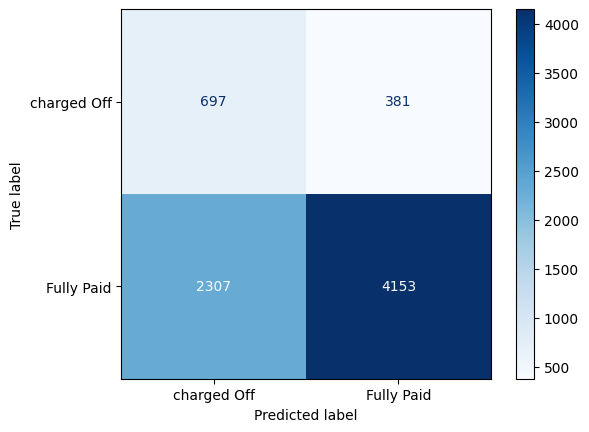

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_conv, y_pred)
print(f'Confusion matrix: \n {cm}')
print('\n')
cmdisp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['charged Off', 'Fully Paid'])
cmdisp.plot(cmap='Blues')
## Plot the Confusion Matrix


In [43]:
from sklearn.metrics import classification_report
CR = classification_report(y_test_conv, y_pred)
## Plot the classification report
print(CR)

              precision    recall  f1-score   support

           0       0.23      0.65      0.34      1078
           1       0.92      0.64      0.76      6460

    accuracy                           0.64      7538
   macro avg       0.57      0.64      0.55      7538
weighted avg       0.82      0.64      0.70      7538



Optimal Threshold: 0.5143
This is the result from logistic regression when using SMOTE and optimal threshold


Precision:0.9159682399647111
Recall:0.6428792569659443
Accuracy:0.6434067391881135
F1:0.7555030016372567


-----------------------------------------------




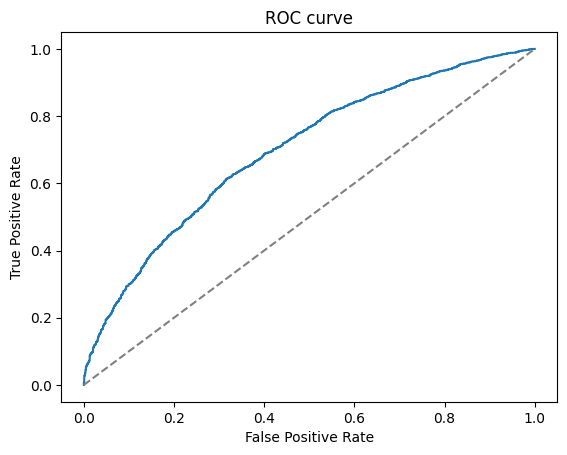

In [44]:
### This is a logistic regression model with SMOTE and optimal threshold.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
LRM = LogisticRegression(max_iter=1000, random_state=1234)
LRM.fit(X_train_smote, y_train_smote)
## Predict probabilities for the test set (To calculate AUC later)
y_proba = LRM.predict_proba(X_test_conv)[:,1]

## compute ROC curve and find the optimal threshold
fpr, tpr, threshold = roc_curve(y_test_conv, y_proba)

# Optimal Threshold: The one that maximizes the difference between true positive rate and false positive rate
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = threshold[optimal_idx]
print(f'Optimal Threshold: {optimal_threshold:.4f}')
# Make predictions using the optimal threshold
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)

# calculate precision, recall, accuracy, and f1 score using optimal threshold
precision_optimal = precision_score(y_test_conv, y_pred)
recall_optimal = recall_score(y_test_conv, y_pred)
accuracy_optimal = accuracy_score(y_test_conv, y_pred)
f1_optimal = f1_score(y_test_conv, y_pred)
roc_auc = roc_auc_score(y_test_conv, y_proba)
print('This is the result from logistic regression when using SMOTE and optimal threshold')
print('\n')
print(f'Precision:{precision_optimal}')
print(f'Recall:{recall_optimal}')
print(f'Accuracy:{accuracy_optimal}')
print(f'F1:{f1_optimal}')
print('\n')
print('-----------------------------------------------')
print('\n')
#plot the ROC curve
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

Confusion matrix: [[ 736  342]
 [2492 3968]]




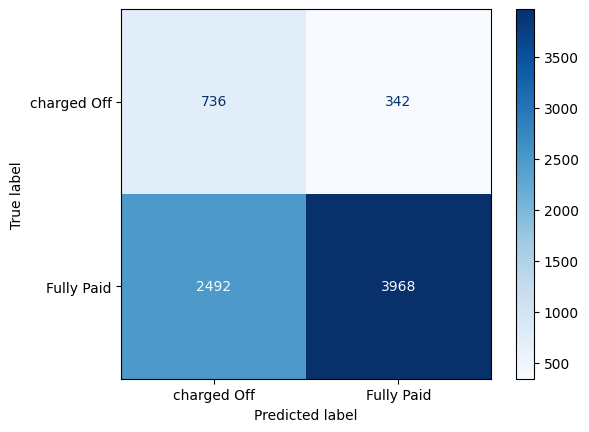

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm1 = confusion_matrix(y_test_conv, y_pred_optimal)
print(f'Confusion matrix: {cm1}')
print('\n')
cmdisp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['charged Off', 'Fully Paid'])
cmdisp1.plot(cmap='Blues')


In [46]:
from sklearn.metrics import classification_report
CR1 = classification_report(y_test_conv, y_pred_optimal)
## Plot the classification report
print(CR1)

              precision    recall  f1-score   support

           0       0.23      0.68      0.34      1078
           1       0.92      0.61      0.74      6460

    accuracy                           0.62      7538
   macro avg       0.57      0.65      0.54      7538
weighted avg       0.82      0.62      0.68      7538



K Nearest Neighbours classifier:

In [47]:
# Create a decision tree model to classify
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_conv, y_train_conv)
knn_y_pred = knn.predict(X_test_conv)

precision_knn_score = precision_score(y_test_conv, knn_y_pred)
recall_knn_score = recall_score(y_test_conv, knn_y_pred)
f1_knn_score = f1_score(y_test_conv, knn_y_pred)
accuracy_knn_score = accuracy_score(y_test_conv, knn_y_pred)

print(f'Precision score : {precision_knn_score}')
print(f'Recall Score : {recall_knn_score}')
print(f'F1 score : {f1_knn_score}')
print(f'Accuracy Score : {accuracy_knn_score}')

Precision score : 0.8612756578041052
Recall Score : 0.9678018575851394
F1 score : 0.9114366936365624
Accuracy Score : 0.8388166622446273


Confusion matrix: 
 [[  71 1007]
 [ 208 6252]]




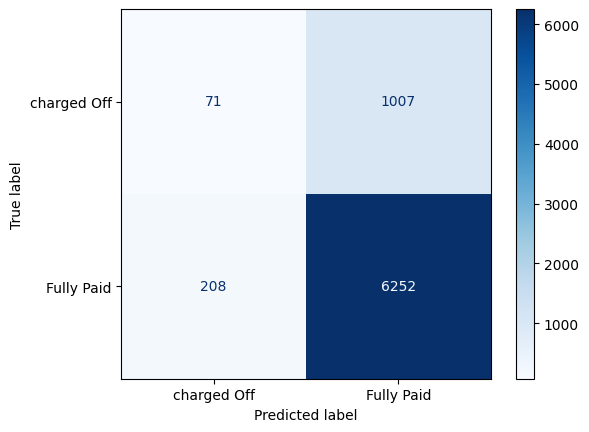

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_knn = confusion_matrix(y_test_conv, knn_y_pred)
print(f'Confusion matrix: \n {cm_knn}')
print('\n')
cmdisp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['charged Off', 'Fully Paid'])
cmdisp_knn.plot(cmap='Blues')

The metrics with KNN looks pretty good. Now let's try using cross validation on splitting the data and then use KNN.

In [74]:
## Using KNN algorithm with K-fold cross validation on the data.
from sklearn.model_selection import KFold
X = pd.concat([X_train_conv, X_test_conv])
y = pd.concat([y_train_conv, y_test_conv])
kf = KFold(n_splits=5, shuffle=True, random_state=41)
cnt=0
for train_idx, test_idx in kf.split(X, y):
  knn = KNeighborsClassifier(n_neighbors=5)
  knn.fit(X.iloc[train_idx], y.iloc[train_idx])
  y_pred = knn.predict(X.iloc[test_idx])

  precision_knn_score = precision_score(y.iloc[test_idx], y_pred)
  recall_knn_score = recall_score(y.iloc[test_idx], y_pred)
  f1_knn_score = f1_score(y.iloc[test_idx], y_pred)
  accuracy_knn_score = accuracy_score(y.iloc[test_idx], y_pred)

  print(f'Precision score for kfold {cnt} : {precision_knn_score}')
  print(f'Recall Score for kfold {cnt}: {recall_knn_score}')
  print(f'F1 score for kfold {cnt}: {f1_knn_score}')
  print(f'Accuracy Score for kfold {cnt}: {accuracy_knn_score}')
  print('________________________________________________________')
  cnt+=1

Precision score for kfold 0 : 0.8557042350669057
Recall Score for kfold 0: 0.9665004674353381
F1 score for kfold 0: 0.9077339577083485
Accuracy Score for kfold 0: 0.8327142478110905
________________________________________________________
Precision score for kfold 1 : 0.8614962251201098
Recall Score for kfold 1: 0.9706155273739561
F1 score for kfold 1: 0.9128063413569922
Accuracy Score for kfold 1: 0.8409392411780313
________________________________________________________
Precision score for kfold 2 : 0.8629890778376884
Recall Score for kfold 2: 0.9670023237800155
F1 score for kfold 2: 0.9120397428404442
Accuracy Score for kfold 2: 0.8402547432665517
________________________________________________________
Precision score for kfold 3 : 0.8656799004011619
Recall Score for kfold 3: 0.9648473635522664
F1 score for kfold 3: 0.9125774699234415
Accuracy Score for kfold 3: 0.8409181371898633
________________________________________________________
Precision score for kfold 4 : 0.862178601050

(37687, 77)


Using Random Forest model with n_estimators = 10.

In [76]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, random_state=41)
rf_model.fit(X_train_conv, y_train_conv)
y_rf_pred = rf_model.predict(X_test_conv)

precision_rf_score = precision_score(y_test_conv, y_rf_pred)
recall_rf_score = recall_score(y_test_conv, y_rf_pred)
f1_rf_score = f1_score(y_test_conv, y_rf_pred)
accuracy_rf_score = accuracy_score(y_test_conv, y_rf_pred)

print('Evaluation metrics for random forest classifier.')
print(f'Precision score : {precision_rf_score}')
print(f'Recall Score : {recall_rf_score}')
print(f'F1 score : {f1_rf_score}')
print(f'Accuracy Score : {accuracy_rf_score}')

Evaluation metrics for random forest classifier.
Precision score : 0.8636426306355991
Recall Score : 0.9696594427244583
F1 score : 0.9135856486545614
Accuracy Score : 0.8427964977447598


Fianlly Building a Random Forest Model with parameter grid and using GridSearchCV for finding the best parameters for our Model.

In [79]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [10,50,100],
    'max_depth': [10,20,30],
    'min_samples_split':[2,5,10]
}
rf_model = RandomForestClassifier(random_state=41)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train_conv, y_train_conv)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_
print(f'Best parameters: {best_params}')

y_pred_rf_best = best_rf_model.predict(X_test_conv)

precision_rf_best = precision_score(y_test_conv, y_pred_rf_best)
recall_rf_best = recall_score(y_test_conv, y_pred_rf_best)
f1_rf_best = f1_score(y_test_conv, y_pred_rf_best)
accuracy_rf_best = accuracy_score(y_test_conv, y_pred_rf_best)
# Step 8: Print the evaluation metrics
print(f'Precision for best rf model: {precision_rf_best:.4f}')
print(f'recall for best rf model: {recall_rf_best:.4f}')
print(f'f1 for best rf model: {f1_rf_best:.4f}')
print(f'accuracy for best rf model: {accuracy_rf_best:.4f}')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 50}
Precision for best rf model: 0.8573
recall for best rf model: 0.9991
f1 for best rf model: 0.9228
accuracy for best rf model: 0.8567


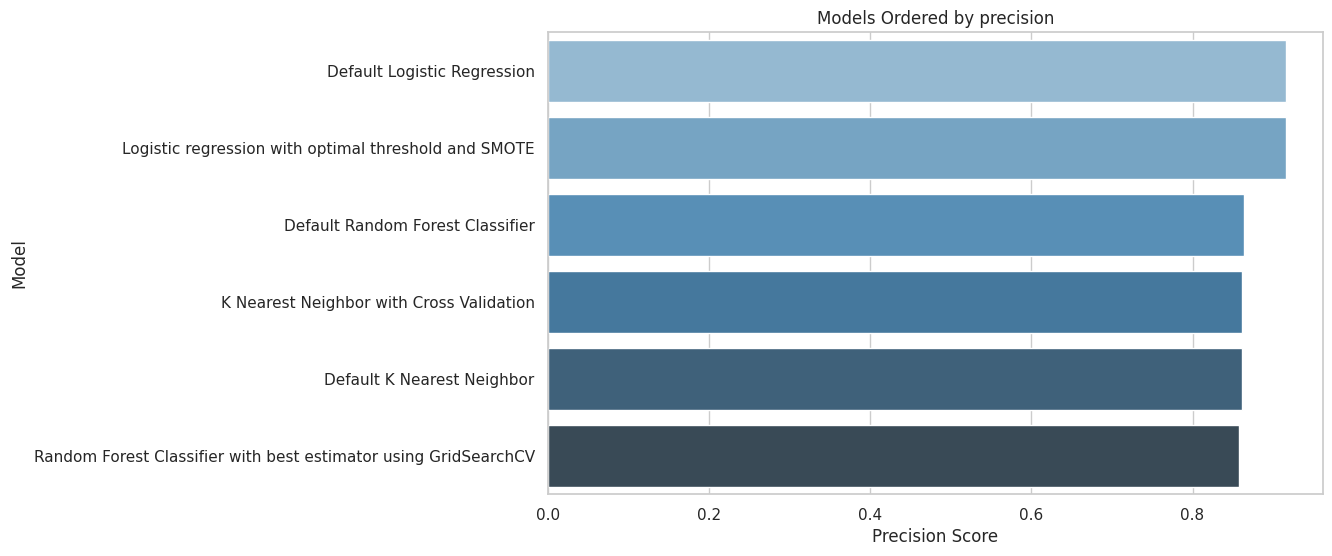

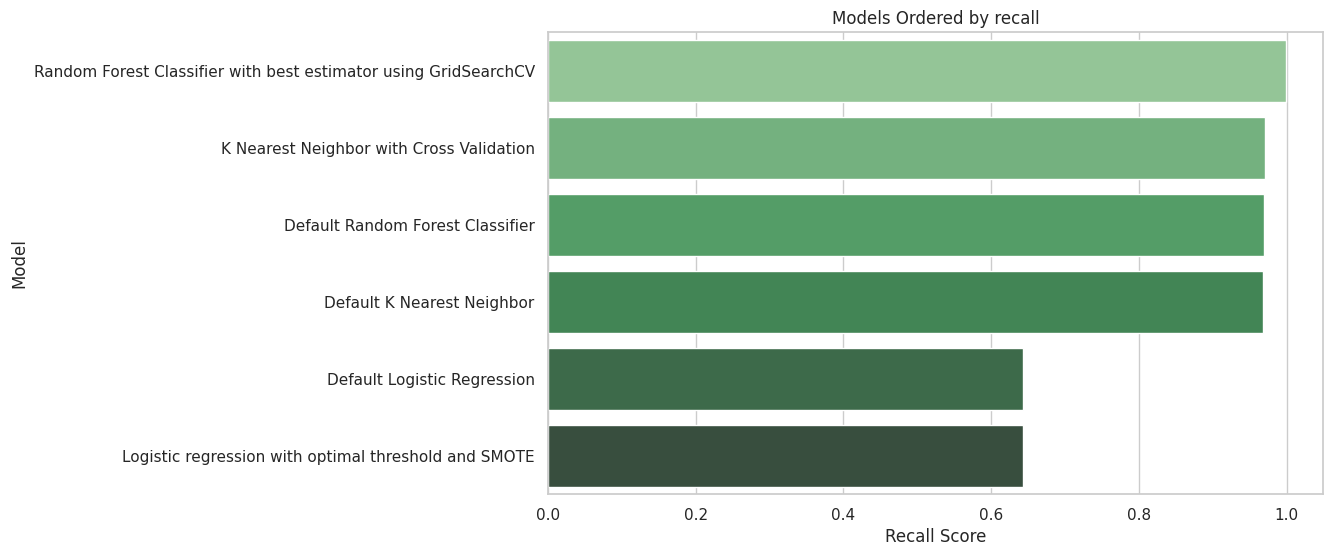

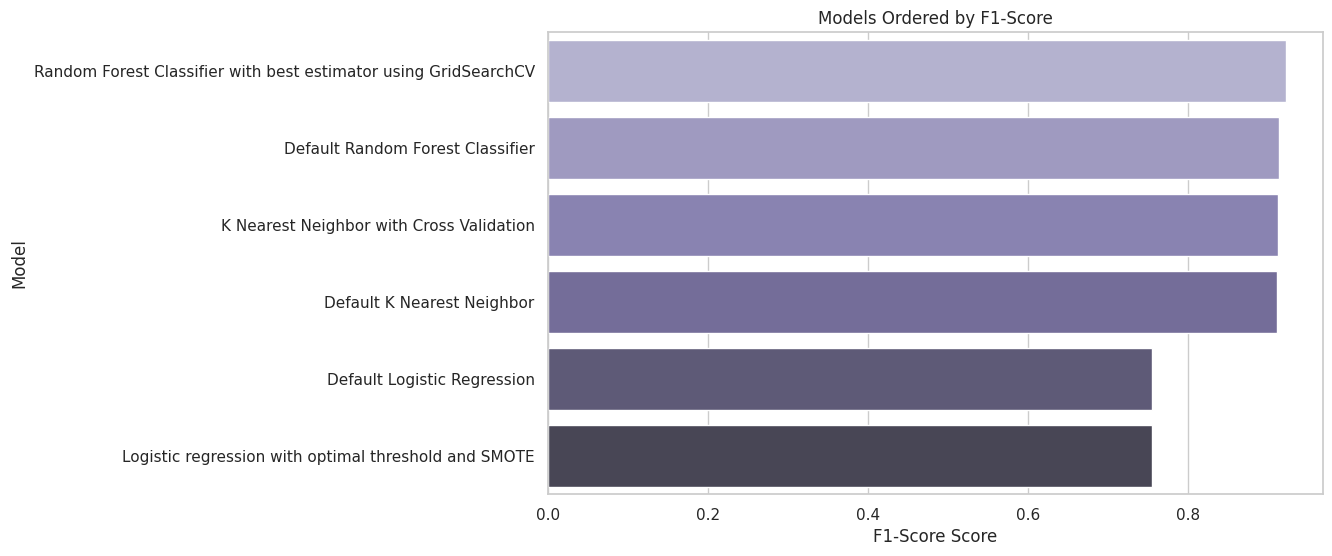

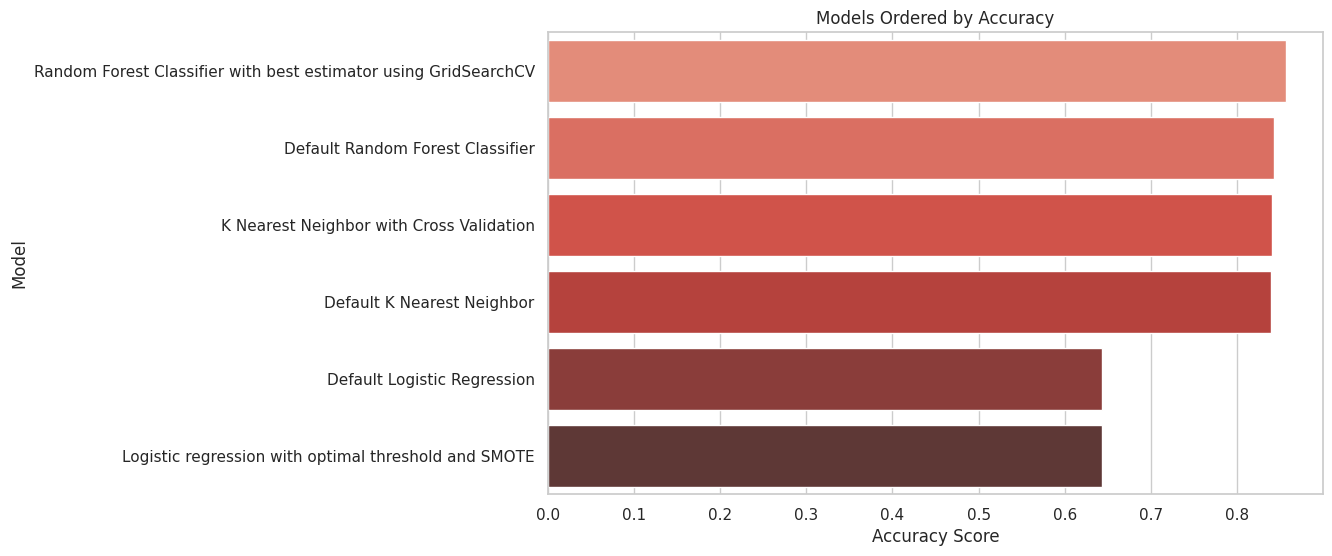

In [88]:
model_names = ['Default Logistic Regression', 'Logistic regression with optimal threshold and SMOTE',
               'Default K Nearest Neighbor', 'K Nearest Neighbor with Cross Validation',
               'Default Random Forest Classifier', 'Random Forest Classifier with best estimator using GridSearchCV']

precision_scores = [0.9159682399647111, 0.9159682399647111, 0.8612756578041052, 0.8614962251201098, 0.8636426306355991, 0.8573]
recall_scores = [0.6428792569659443, 0.6428792569659443, 0.9678018575851394, 0.9706155273739561, 0.9696594427244583, 0.9991]
f1_scores = [0.7555030016372567, 0.7555030016372567, 0.9114366936365624, 0.9128063413569922, 0.9135856486545614, 0.9228]
accuracy_scores = [0.6434067391881135, 0.6434067391881135, 0.8388166622446273, 0.8409392411780313, 0.8427964977447598, 0.8567]

df = pd.DataFrame({
    'Model': model_names,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores,
    'Accuracy': accuracy_scores
})
df_precision_sorted = df.sort_values(by='Precision', ascending=False)
df_recall_sorted = df.sort_values(by='Recall', ascending=False)
df_f1_sorted = df.sort_values(by='F1-Score', ascending=False)
df_accuracy_sorted = df.sort_values(by='Accuracy', ascending=False)

sns.set(style='whitegrid')

plt.figure(figsize=(10,6))
sns.barplot(x='Precision', y='Model', data=df_precision_sorted, palette='Blues_d')
plt.title("Models Ordered by precision")
plt.xlabel('Precision Score')
plt.ylabel('Model')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='Recall', y='Model', data=df_recall_sorted, palette='Greens_d')
plt.title("Models Ordered by recall")
plt.xlabel('Recall Score')
plt.ylabel('Model')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='F1-Score', y='Model', data=df_f1_sorted, palette='Purples_d')
plt.title("Models Ordered by F1-Score")
plt.xlabel('F1-Score Score')
plt.ylabel('Model')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='Accuracy', y='Model', data=df_accuracy_sorted, palette='Reds_d')
plt.title("Models Ordered by Accuracy")
plt.xlabel('Accuracy Score')
plt.ylabel('Model')
plt.show()



## Summary

**Key Observations**


*   Default Logistic Regression vs. Logistic Regression with SMOTE:

Both perform identically across all metrics.
Precision is high (0.916), but recall is low (0.643), indicating the model predicts "Charged Off" loans cautiously but misses many actual defaults.

*   Default KNN and KNN with Cross Validation:

Precision is lower than Logistic Regression (0.861), but recall is significantly higher (0.97), meaning these models identify most "Charged Off" loans but with more false positives.
The F1 score (~0.911–0.913) is much better than Logistic Regression, showing a good balance between precision and recall.
Accuracy improves to ~0.84.

*   Default Random Forest Classifier:

Precision (0.864) and recall (0.97) are similar to KNN.
F1 score is slightly higher (0.914), and accuracy improves slightly (~0.843).

*   Random Forest with GridSearchCV:

The best recall (0.999), meaning almost no defaults are missed.
Precision drops slightly (0.857), meaning slightly more false positives than Default Random Forest.
The highest F1 score (0.923) indicates this model provides the best balance.
Accuracy (0.857) is the highest of all models.

**Choosing the Best Model**

The choice depends on your business goals:
*   If avoiding missed defaults (false negatives) is most important (e.g., minimizing risk in lending):

  *   The Random Forest with GridSearchCV is the best choice due to its near-perfect recall (0.999).
  *   It sacrifices a bit of precision, but catching almost all defaults could justify this tradeoff.


*   If a balance between precision and recall is more critical:


  *   The Default Random Forest Classifier or KNN with Cross Validation are good options, as they maintain a good balance (F1 score ~0.91–0.914) while keeping decent precision and recall.

*   If avoiding false positives is critical (e.g., not rejecting too many good loans):

  *   The Default Logistic Regression or Logistic Regression with SMOTE are better since they prioritize precision (0.916) over recall.























---

### **Some Python libraries that are worth exploring for similar projects**
  - **tqdm**: A Python library used to create progress bars for iterables. It provides visual feedback on the progress of long-running operations, making it easier to track the execution time and estimate the remaining time.
  - **Low-code learning libraries** Use lazypredict or PyCaret to compare the performance of multiple Machine Learning models simultaneously. *The best part is that you only need to write fewer than 10 lines of code.*
  - **Explainable AI**: Understand model decisions through techniques like LIME or SHAP.